In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
import numpy as np
import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

In [3]:
csv = pd.read_csv("SPLUSiDR4_GaiaEDR3_BJ21_LAMOSTDR7_SEGUE.csv", encoding='latin-1', index_col=['ID', 'RA_SPLUS', 'DEC_SPLUS'])
xtrain = pd.DataFrame()
ytrain = pd.DataFrame()

In [4]:
csv

,,,u_0,J378_0,J395_0,J410_0,J430_0,g_0,J515_0,r_0,J660_0,i_0,...,feh_LAMOST_err,teff_LAMOST_recalibrated,logg_LAMOST_recalibrated,feh_LAMOST_recalibrated,teff_training,teff_training_err,logg_training,logg_training_err,feh_training,feh_training_err
ID,RA_SPLUS,DEC_SPLUS,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s01_0000103,150.174918,-0.707248,18.740275,18.459236,18.448148,17.773576,17.745170,17.453267,17.281794,16.996103,16.979660,16.878871,...,NaN,NaN,NaN,NaN,5777,9,4.27,0.05,-0.42,0.04
iDR4_3_SPLUS-n01s01_0000131,150.247784,-0.706343,17.961170,17.557527,17.395885,16.940903,16.960105,16.798380,16.634018,16.553750,16.562136,16.524397,...,0.088,6695.90,3.986,-0.575,6567,18,3.82,0.06,-0.53,0.03
iDR4_3_SPLUS-n01s01_0000200,150.966743,-0.705547,15.610993,15.151029,14.938563,14.678464,14.614623,14.519800,14.358354,14.258020,14.280045,14.259589,...,0.058,6596.29,3.741,-0.471,6683,17,3.81,0.06,-0.35,0.02
iDR4_3_SPLUS-n01s01_0000220,150.436039,-0.703092,18.196770,17.862429,17.808803,17.216337,17.137261,16.869861,16.693803,16.442250,16.429073,16.330336,...,NaN,NaN,NaN,NaN,5847,46,4.08,0.04,-0.31,0.02
iDR4_3_SPLUS-n01s01_0000248,150.416858,-0.702641,17.882518,17.664711,17.522903,16.866583,16.798515,16.354411,16.198380,15.784910,15.729709,15.614563,...,0.051,5340.13,4.454,-0.703,5280,38,4.49,0.06,-0.84,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0047436,358.244396,1.317788,19.305300,18.933995,18.973642,18.284042,18.290215,17.841979,17.704608,17.396171,17.388831,17.271604,...,0.119,5636.50,4.316,-0.692,5637,109,4.32,0.18,-0.69,0.12
iDR4_3_STRIPE82-0170_0047656,358.443639,1.319673,16.435508,16.125900,15.977774,15.279934,15.188697,14.779653,14.595130,14.282482,14.243314,14.105358,...,0.062,5591.32,4.205,-0.122,5591,59,4.21,0.09,-0.12,0.06
iDR4_3_STRIPE82-0170_0048158,358.291405,1.288510,15.140979,14.620409,14.519064,14.139961,14.072554,13.942583,13.793976,13.681078,13.694912,13.620172,...,0.040,6564.66,3.897,-0.647,6565,43,3.90,0.06,-0.65,0.04


In [118]:
print('min: ', csv['teff_training'].min())
print('max: ', csv['teff_training'].max())

min:  4001
max:  7048


In [119]:
print('min: ', csv['logg_training'].min())
print('max: ', csv['logg_training'].max())

min:  0.21
max:  4.92


In [120]:
print('min: ', csv['feh_training'].min())
print('max: ', csv['feh_training'].max())

min:  -4.21
max:  0.74


In [5]:
a = csv.columns
for i in a:
    print(i)

u_0
J378_0
J395_0
J410_0
J430_0
g_0
J515_0
r_0
J660_0
i_0
J861_0
z_0
sf11_ebv
e_u_PStotal
e_J0378_PStotal
e_J0395_PStotal
e_J0410_PStotal
e_J0430_PStotal
e_g_PStotal
e_J0515_PStotal
e_r_PStotal
e_J0660_PStotal
e_i_PStotal
e_J0861_PStotal
e_z_PStotal
s2n_DET_auto
SEX_FLAGS_DET
ra_epoch2000
dec_epoch2000
source_id
ra_GaiaEDR3
ra_GaiaEDR3_error
dec_GaiaEDR3
dec_GaiaEDR3_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
astrometric_n_good_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
pseudocolour
pseudocolour_error
visibility_periods_used
ruwe
duplicated_source
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_mag
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_mag
phot_rp_mean_flux
phot_rp_mean_mag
phot_bp_rp_excess_factor
bp_rp
dr2_radial_velocity
dr2_radial_velocity_error
phot_g_mean_mag_error
phot_bp_mean_mag_error
phot_rp_mean_mag_error
phot_g_mean_mag_correcte

# Configurando rede

In [78]:
def generate_weights(feh,bins=20):
    b_size=[]
    sample_weights=np.ones(len(feh))
    bin_size=(max(feh)-min(feh))/bins
    a1=np.where(feh==min(feh))[0]
    for i in range(bins):
            b=np.where((feh>min(feh)+i*bin_size)&(feh<=min(feh)+(i+1)*bin_size))[0]
            b_size.append(b.shape[0])
    for i in range(bins):
        a0=np.where((feh>min(feh)+i*bin_size)&(feh<=min(feh)+(i+1)*bin_size))[0]
        sample_weights[a0]=np.sqrt(max(b_size)/(a0.shape[0]))
        if i==0:
            sample_weights[a1]=np.sqrt(max(b_size)/(a0.shape[0]))
    return np.array(sample_weights)

In [79]:
# define baseline model
def baseline_model():
    # create model
    input_x0 = Input(shape=(12,), name='inp0')   
    encoded0 = Dense(300, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(200, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(100, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a2)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model
model = baseline_model()

# Escolha do tipo de filtro utilizar

### SEGUE

In [193]:
xtrain = csv.loc[(csv['SNR_SEGUE']>10) & 
                (csv['teff_SEGUE']>4000) & 
                (csv['teff_SEGUE']<7000),
                ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [194]:
ytrain = csv.loc[(csv['SNR_SEGUE']>10) & 
                (csv['teff_SEGUE']>4000) & 
                (csv['teff_SEGUE']<7000),
                ['teff_training']]

In [195]:
scaler = MinMaxScaler(feature_range = (-1,1))

In [196]:
train_x= scaler.fit_transform(xtrain)#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y= scaler.fit_transform(ytrain)#The input vector: [Fe/H] values; For example, it is an array with the shape of (189654,1);
#train_y = ytrain

In [197]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [198]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [199]:
sample_weights=generate_weights(np.array(Y_train),bins=20)#The 'sample_weights' and the 'train_y' should have the same shape.

##### Roda do zero para resetar o modelo

In [201]:
model = baseline_model()

In [202]:
# Rodar os primeiros testes para ignorar os maiores loss                                             (sample_weight=sample_weights, )
model.fit(X_train, Y_train, epochs =10, validation_data=(X_val, Y_val), batch_size = 512, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/10
57/57 - 1s - loss: 0.2077 - val_loss: 0.1985 - 904ms/epoch - 16ms/step
Epoch 2/10
57/57 - 0s - loss: 0.1926 - val_loss: 0.1735 - 270ms/epoch - 5ms/step
Epoch 3/10
57/57 - 0s - loss: 0.1432 - val_loss: 0.0940 - 267ms/epoch - 5ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0551 - val_loss: 0.0339 - 250ms/epoch - 4ms/step
Epoch 5/10
57/57 - 0s - loss: 0.0275 - val_loss: 0.0267 - 248ms/epoch - 4ms/step
Epoch 6/10
57/57 - 0s - loss: 0.0223 - val_loss: 0.0235 - 267ms/epoch - 5ms/step
Epoch 7/10
57/57 - 0s - loss: 0.0198 - val_loss: 0.0215 - 240ms/epoch - 4ms/step
Epoch 8/10
57/57 - 0s - loss: 0.0182 - val_loss: 0.0203 - 249ms/epoch - 4ms/step
Epoch 9/10
57/57 - 0s - loss: 0.0174 - val_loss: 0.0195 - 239ms/epoch - 4ms/step
Epoch 10/10
57/57 - 0s - loss: 0.0168 - val_loss: 0.0191 - 244ms/epoch - 4ms/step


In [203]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
history = model.fit(X_train, Y_train, epochs = 1000, validation_data=(X_val, Y_val), batch_size = 512, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)
model.save('model/model_Segue__V.h5')#The trained model will be put here.

Epoch 1/1000
57/57 - 0s - loss: 0.0164 - val_loss: 0.0186 - 388ms/epoch - 7ms/step
Epoch 2/1000
57/57 - 0s - loss: 0.0162 - val_loss: 0.0181 - 243ms/epoch - 4ms/step
Epoch 3/1000
57/57 - 0s - loss: 0.0159 - val_loss: 0.0192 - 243ms/epoch - 4ms/step
Epoch 4/1000
57/57 - 0s - loss: 0.0157 - val_loss: 0.0176 - 262ms/epoch - 5ms/step
Epoch 5/1000
57/57 - 0s - loss: 0.0154 - val_loss: 0.0174 - 248ms/epoch - 4ms/step
Epoch 6/1000
57/57 - 0s - loss: 0.0152 - val_loss: 0.0172 - 266ms/epoch - 5ms/step
Epoch 7/1000
57/57 - 0s - loss: 0.0151 - val_loss: 0.0172 - 247ms/epoch - 4ms/step
Epoch 8/1000
57/57 - 0s - loss: 0.0150 - val_loss: 0.0169 - 262ms/epoch - 5ms/step
Epoch 9/1000
57/57 - 0s - loss: 0.0148 - val_loss: 0.0170 - 264ms/epoch - 5ms/step
Epoch 10/1000
57/57 - 0s - loss: 0.0148 - val_loss: 0.0166 - 261ms/epoch - 5ms/step
Epoch 11/1000
57/57 - 0s - loss: 0.0146 - val_loss: 0.0166 - 308ms/epoch - 5ms/step
Epoch 12/1000
57/57 - 0s - loss: 0.0144 - val_loss: 0.0165 - 273ms/epoch - 5ms/step
E

Epoch 99/1000
57/57 - 0s - loss: 0.0106 - val_loss: 0.0125 - 228ms/epoch - 4ms/step
Epoch 100/1000
57/57 - 0s - loss: 0.0106 - val_loss: 0.0125 - 223ms/epoch - 4ms/step
Epoch 101/1000
57/57 - 0s - loss: 0.0106 - val_loss: 0.0129 - 222ms/epoch - 4ms/step
Epoch 102/1000
57/57 - 0s - loss: 0.0106 - val_loss: 0.0124 - 238ms/epoch - 4ms/step
Epoch 103/1000
57/57 - 0s - loss: 0.0106 - val_loss: 0.0124 - 219ms/epoch - 4ms/step
Epoch 104/1000
57/57 - 0s - loss: 0.0105 - val_loss: 0.0124 - 225ms/epoch - 4ms/step
Epoch 105/1000
57/57 - 0s - loss: 0.0105 - val_loss: 0.0123 - 225ms/epoch - 4ms/step
Epoch 106/1000
57/57 - 0s - loss: 0.0104 - val_loss: 0.0123 - 221ms/epoch - 4ms/step
Epoch 107/1000
57/57 - 0s - loss: 0.0104 - val_loss: 0.0123 - 222ms/epoch - 4ms/step
Epoch 108/1000
57/57 - 0s - loss: 0.0104 - val_loss: 0.0124 - 224ms/epoch - 4ms/step
Epoch 109/1000
57/57 - 0s - loss: 0.0105 - val_loss: 0.0125 - 224ms/epoch - 4ms/step
Epoch 110/1000
57/57 - 0s - loss: 0.0104 - val_loss: 0.0123 - 236m

Epoch 196/1000
57/57 - 0s - loss: 0.0093 - val_loss: 0.0109 - 255ms/epoch - 4ms/step
Epoch 197/1000
57/57 - 0s - loss: 0.0094 - val_loss: 0.0110 - 298ms/epoch - 5ms/step
Epoch 198/1000
57/57 - 0s - loss: 0.0093 - val_loss: 0.0110 - 357ms/epoch - 6ms/step
Epoch 199/1000
57/57 - 0s - loss: 0.0093 - val_loss: 0.0108 - 250ms/epoch - 4ms/step
Epoch 200/1000
57/57 - 0s - loss: 0.0093 - val_loss: 0.0108 - 244ms/epoch - 4ms/step
Epoch 201/1000
57/57 - 0s - loss: 0.0092 - val_loss: 0.0108 - 250ms/epoch - 4ms/step
Epoch 202/1000
57/57 - 0s - loss: 0.0093 - val_loss: 0.0109 - 254ms/epoch - 4ms/step
Epoch 203/1000
57/57 - 0s - loss: 0.0092 - val_loss: 0.0107 - 252ms/epoch - 4ms/step
Epoch 204/1000
57/57 - 0s - loss: 0.0092 - val_loss: 0.0108 - 254ms/epoch - 4ms/step
Epoch 205/1000
57/57 - 0s - loss: 0.0092 - val_loss: 0.0108 - 250ms/epoch - 4ms/step
Epoch 206/1000
57/57 - 0s - loss: 0.0092 - val_loss: 0.0114 - 251ms/epoch - 4ms/step
Epoch 207/1000
57/57 - 0s - loss: 0.0093 - val_loss: 0.0107 - 256

Epoch 293/1000
57/57 - 0s - loss: 0.0085 - val_loss: 0.0097 - 252ms/epoch - 4ms/step
Epoch 294/1000
57/57 - 0s - loss: 0.0086 - val_loss: 0.0098 - 259ms/epoch - 5ms/step
Epoch 295/1000
57/57 - 0s - loss: 0.0085 - val_loss: 0.0098 - 256ms/epoch - 4ms/step
Epoch 296/1000
57/57 - 0s - loss: 0.0085 - val_loss: 0.0098 - 264ms/epoch - 5ms/step
Epoch 297/1000
57/57 - 0s - loss: 0.0086 - val_loss: 0.0097 - 257ms/epoch - 5ms/step
Epoch 298/1000
57/57 - 0s - loss: 0.0085 - val_loss: 0.0098 - 260ms/epoch - 5ms/step
Epoch 299/1000
57/57 - 0s - loss: 0.0085 - val_loss: 0.0099 - 257ms/epoch - 5ms/step
Epoch 300/1000
57/57 - 0s - loss: 0.0085 - val_loss: 0.0097 - 266ms/epoch - 5ms/step
Epoch 301/1000
57/57 - 0s - loss: 0.0084 - val_loss: 0.0098 - 296ms/epoch - 5ms/step
Epoch 302/1000
57/57 - 0s - loss: 0.0085 - val_loss: 0.0097 - 247ms/epoch - 4ms/step
Epoch 303/1000
57/57 - 0s - loss: 0.0084 - val_loss: 0.0096 - 248ms/epoch - 4ms/step
Epoch 304/1000
57/57 - 0s - loss: 0.0084 - val_loss: 0.0097 - 252

Epoch 390/1000
57/57 - 0s - loss: 0.0079 - val_loss: 0.0091 - 258ms/epoch - 5ms/step
Epoch 391/1000
57/57 - 0s - loss: 0.0080 - val_loss: 0.0091 - 255ms/epoch - 4ms/step
Epoch 392/1000
57/57 - 0s - loss: 0.0079 - val_loss: 0.0091 - 255ms/epoch - 4ms/step
Epoch 393/1000
57/57 - 0s - loss: 0.0080 - val_loss: 0.0091 - 272ms/epoch - 5ms/step
Epoch 394/1000
57/57 - 0s - loss: 0.0079 - val_loss: 0.0093 - 257ms/epoch - 5ms/step
Epoch 395/1000
57/57 - 0s - loss: 0.0080 - val_loss: 0.0094 - 259ms/epoch - 5ms/step
Epoch 396/1000
57/57 - 0s - loss: 0.0080 - val_loss: 0.0090 - 262ms/epoch - 5ms/step
Epoch 397/1000
57/57 - 0s - loss: 0.0080 - val_loss: 0.0091 - 259ms/epoch - 5ms/step
Epoch 398/1000
57/57 - 0s - loss: 0.0079 - val_loss: 0.0090 - 259ms/epoch - 5ms/step
Epoch 399/1000
57/57 - 0s - loss: 0.0079 - val_loss: 0.0091 - 261ms/epoch - 5ms/step
Epoch 400/1000
57/57 - 0s - loss: 0.0079 - val_loss: 0.0091 - 259ms/epoch - 5ms/step
Epoch 401/1000
57/57 - 0s - loss: 0.0079 - val_loss: 0.0091 - 259

Epoch 487/1000
57/57 - 0s - loss: 0.0076 - val_loss: 0.0086 - 256ms/epoch - 4ms/step
Epoch 488/1000
57/57 - 0s - loss: 0.0076 - val_loss: 0.0089 - 258ms/epoch - 5ms/step
Epoch 489/1000
57/57 - 0s - loss: 0.0077 - val_loss: 0.0086 - 260ms/epoch - 5ms/step
Epoch 490/1000
57/57 - 0s - loss: 0.0076 - val_loss: 0.0086 - 255ms/epoch - 4ms/step
Epoch 491/1000
57/57 - 0s - loss: 0.0076 - val_loss: 0.0086 - 255ms/epoch - 4ms/step
Epoch 492/1000
57/57 - 0s - loss: 0.0079 - val_loss: 0.0088 - 255ms/epoch - 4ms/step
Epoch 493/1000
57/57 - 0s - loss: 0.0076 - val_loss: 0.0086 - 254ms/epoch - 4ms/step
Epoch 494/1000
57/57 - 0s - loss: 0.0076 - val_loss: 0.0086 - 258ms/epoch - 5ms/step
Epoch 495/1000
57/57 - 0s - loss: 0.0075 - val_loss: 0.0086 - 254ms/epoch - 4ms/step
Epoch 496/1000
57/57 - 0s - loss: 0.0076 - val_loss: 0.0089 - 255ms/epoch - 4ms/step
Epoch 497/1000
57/57 - 0s - loss: 0.0077 - val_loss: 0.0087 - 254ms/epoch - 4ms/step
Epoch 498/1000
57/57 - 0s - loss: 0.0075 - val_loss: 0.0087 - 257

Epoch 584/1000
57/57 - 0s - loss: 0.0073 - val_loss: 0.0084 - 248ms/epoch - 4ms/step
Epoch 585/1000
57/57 - 0s - loss: 0.0074 - val_loss: 0.0083 - 249ms/epoch - 4ms/step
Epoch 586/1000
57/57 - 0s - loss: 0.0074 - val_loss: 0.0084 - 252ms/epoch - 4ms/step
Epoch 587/1000
57/57 - 0s - loss: 0.0073 - val_loss: 0.0084 - 248ms/epoch - 4ms/step
Epoch 588/1000
57/57 - 0s - loss: 0.0073 - val_loss: 0.0083 - 248ms/epoch - 4ms/step
Epoch 589/1000
57/57 - 0s - loss: 0.0073 - val_loss: 0.0084 - 248ms/epoch - 4ms/step
Epoch 590/1000
57/57 - 0s - loss: 0.0073 - val_loss: 0.0083 - 250ms/epoch - 4ms/step
Epoch 591/1000
57/57 - 0s - loss: 0.0075 - val_loss: 0.0083 - 250ms/epoch - 4ms/step
Epoch 592/1000
57/57 - 0s - loss: 0.0074 - val_loss: 0.0084 - 250ms/epoch - 4ms/step
Epoch 593/1000
57/57 - 0s - loss: 0.0073 - val_loss: 0.0084 - 261ms/epoch - 5ms/step
Epoch 594/1000
57/57 - 0s - loss: 0.0073 - val_loss: 0.0084 - 263ms/epoch - 5ms/step
Epoch 595/1000
57/57 - 0s - loss: 0.0073 - val_loss: 0.0083 - 249

Epoch 681/1000
57/57 - 0s - loss: 0.0072 - val_loss: 0.0081 - 256ms/epoch - 4ms/step
Epoch 682/1000
57/57 - 0s - loss: 0.0072 - val_loss: 0.0086 - 255ms/epoch - 4ms/step
Epoch 683/1000
57/57 - 0s - loss: 0.0072 - val_loss: 0.0087 - 253ms/epoch - 4ms/step
Epoch 684/1000
57/57 - 0s - loss: 0.0073 - val_loss: 0.0082 - 252ms/epoch - 4ms/step
Epoch 685/1000
57/57 - 0s - loss: 0.0072 - val_loss: 0.0081 - 253ms/epoch - 4ms/step
Epoch 686/1000
57/57 - 0s - loss: 0.0072 - val_loss: 0.0081 - 255ms/epoch - 4ms/step
Epoch 687/1000
57/57 - 0s - loss: 0.0071 - val_loss: 0.0082 - 252ms/epoch - 4ms/step
Epoch 688/1000
57/57 - 0s - loss: 0.0072 - val_loss: 0.0082 - 254ms/epoch - 4ms/step
Epoch 689/1000
57/57 - 0s - loss: 0.0073 - val_loss: 0.0082 - 254ms/epoch - 4ms/step
Epoch 690/1000
57/57 - 0s - loss: 0.0073 - val_loss: 0.0081 - 262ms/epoch - 5ms/step
Epoch 691/1000
57/57 - 0s - loss: 0.0073 - val_loss: 0.0081 - 253ms/epoch - 4ms/step
Epoch 692/1000
57/57 - 0s - loss: 0.0071 - val_loss: 0.0081 - 252

Epoch 778/1000
57/57 - 0s - loss: 0.0070 - val_loss: 0.0080 - 262ms/epoch - 5ms/step
Epoch 779/1000
57/57 - 0s - loss: 0.0070 - val_loss: 0.0081 - 299ms/epoch - 5ms/step
Epoch 780/1000
57/57 - 0s - loss: 0.0070 - val_loss: 0.0081 - 255ms/epoch - 4ms/step
Epoch 781/1000
57/57 - 0s - loss: 0.0070 - val_loss: 0.0079 - 254ms/epoch - 4ms/step
Epoch 782/1000
57/57 - 0s - loss: 0.0070 - val_loss: 0.0080 - 259ms/epoch - 5ms/step
Epoch 783/1000
57/57 - 0s - loss: 0.0070 - val_loss: 0.0080 - 252ms/epoch - 4ms/step
Epoch 784/1000
57/57 - 0s - loss: 0.0070 - val_loss: 0.0082 - 251ms/epoch - 4ms/step
Epoch 785/1000
57/57 - 0s - loss: 0.0070 - val_loss: 0.0080 - 250ms/epoch - 4ms/step
Epoch 786/1000
57/57 - 0s - loss: 0.0070 - val_loss: 0.0080 - 256ms/epoch - 4ms/step
Epoch 787/1000
57/57 - 0s - loss: 0.0070 - val_loss: 0.0082 - 257ms/epoch - 5ms/step
Epoch 788/1000
57/57 - 0s - loss: 0.0070 - val_loss: 0.0080 - 256ms/epoch - 4ms/step
Epoch 789/1000
57/57 - 0s - loss: 0.0071 - val_loss: 0.0080 - 257

Epoch 875/1000
57/57 - 0s - loss: 0.0070 - val_loss: 0.0079 - 254ms/epoch - 4ms/step
Epoch 876/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0079 - 254ms/epoch - 4ms/step
Epoch 877/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0079 - 259ms/epoch - 5ms/step
Epoch 878/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0078 - 256ms/epoch - 4ms/step
Epoch 879/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0078 - 296ms/epoch - 5ms/step
Epoch 880/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0079 - 256ms/epoch - 4ms/step
Epoch 881/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0080 - 252ms/epoch - 4ms/step
Epoch 882/1000
57/57 - 0s - loss: 0.0068 - val_loss: 0.0078 - 249ms/epoch - 4ms/step
Epoch 883/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0079 - 250ms/epoch - 4ms/step
Epoch 884/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0079 - 248ms/epoch - 4ms/step
Epoch 885/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0079 - 249ms/epoch - 4ms/step
Epoch 886/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0078 - 249

Epoch 972/1000
57/57 - 0s - loss: 0.0068 - val_loss: 0.0078 - 257ms/epoch - 5ms/step
Epoch 973/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0078 - 255ms/epoch - 4ms/step
Epoch 974/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0077 - 257ms/epoch - 5ms/step
Epoch 975/1000
57/57 - 0s - loss: 0.0067 - val_loss: 0.0078 - 259ms/epoch - 5ms/step
Epoch 976/1000
57/57 - 0s - loss: 0.0067 - val_loss: 0.0078 - 257ms/epoch - 5ms/step
Epoch 977/1000
57/57 - 0s - loss: 0.0069 - val_loss: 0.0077 - 255ms/epoch - 4ms/step
Epoch 978/1000
57/57 - 0s - loss: 0.0068 - val_loss: 0.0077 - 256ms/epoch - 4ms/step
Epoch 979/1000
57/57 - 0s - loss: 0.0068 - val_loss: 0.0077 - 260ms/epoch - 5ms/step
Epoch 980/1000
57/57 - 0s - loss: 0.0068 - val_loss: 0.0077 - 261ms/epoch - 5ms/step
Epoch 981/1000
57/57 - 0s - loss: 0.0068 - val_loss: 0.0078 - 259ms/epoch - 5ms/step
Epoch 982/1000
57/57 - 0s - loss: 0.0068 - val_loss: 0.0079 - 294ms/epoch - 5ms/step
Epoch 983/1000
57/57 - 0s - loss: 0.0068 - val_loss: 0.0077 - 253

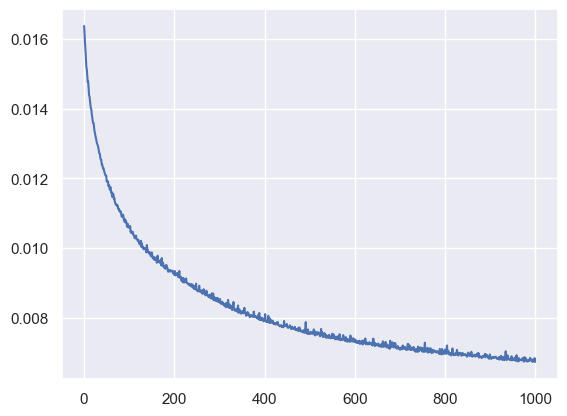

In [204]:
plt.plot(history.history['loss'])

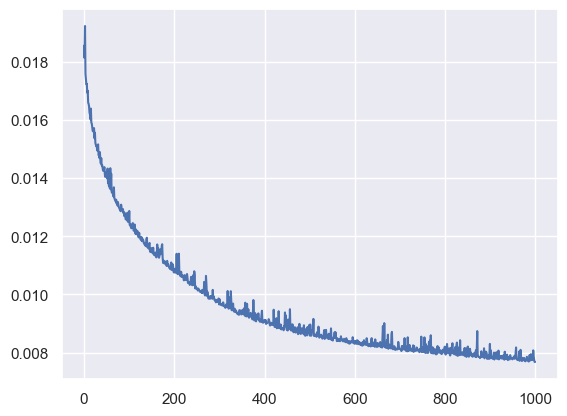

In [205]:
plt.plot(history.history['val_loss']) #dar smoothie nas curvas kkkkkk para colocar no paper

### LAMOST

In [159]:
xtrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [160]:
ytrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['teff_training']]

In [161]:
scaler = MinMaxScaler(feature_range = (-1,1))

In [162]:
train_x= scaler.fit_transform(xtrain)#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y= scaler.fit_transform(ytrain)#The input vector: [Fe/H] values; For example, it is an array with the shape of (189654,1);
#train_y = ytrain

In [163]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [164]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [165]:
sample_weights=generate_weights(np.array(Y_train),bins=20)#The 'sample_weights' and the 'train_y' should have the same shape.

##### Roda do zero para resetar o modelo

In [179]:
model = baseline_model()

In [180]:
bs = 512 

In [181]:
# Rodar os primeiros testes para ignorar os maiores loss                                             (sample_weight=sample_weights, )
model.fit(X_train, Y_train, epochs = 10, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/10
74/74 - 1s - loss: 0.1396 - val_loss: 0.1350 - 1s/epoch - 14ms/step
Epoch 2/10
74/74 - 0s - loss: 0.1321 - val_loss: 0.1255 - 394ms/epoch - 5ms/step
Epoch 3/10
74/74 - 0s - loss: 0.1150 - val_loss: 0.0971 - 375ms/epoch - 5ms/step
Epoch 4/10
74/74 - 0s - loss: 0.0761 - val_loss: 0.0520 - 370ms/epoch - 5ms/step
Epoch 5/10
74/74 - 0s - loss: 0.0370 - val_loss: 0.0255 - 394ms/epoch - 5ms/step
Epoch 6/10
74/74 - 0s - loss: 0.0237 - val_loss: 0.0215 - 372ms/epoch - 5ms/step
Epoch 7/10
74/74 - 0s - loss: 0.0213 - val_loss: 0.0199 - 340ms/epoch - 5ms/step
Epoch 8/10
74/74 - 0s - loss: 0.0204 - val_loss: 0.0193 - 345ms/epoch - 5ms/step
Epoch 9/10
74/74 - 0s - loss: 0.0198 - val_loss: 0.0192 - 354ms/epoch - 5ms/step
Epoch 10/10
74/74 - 0s - loss: 0.0194 - val_loss: 0.0201 - 347ms/epoch - 5ms/step


In [182]:
# Treinando e guardando o modelo                                                                                 (sample_weight=sample_weights, )
history = model.fit(X_train, Y_train, epochs = 1000, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
model.save('model/model_lamost__V.h5') 

Epoch 1/1000
74/74 - 1s - loss: 0.0190 - val_loss: 0.0190 - 519ms/epoch - 7ms/step
Epoch 2/1000
74/74 - 0s - loss: 0.0189 - val_loss: 0.0187 - 409ms/epoch - 6ms/step
Epoch 3/1000
74/74 - 0s - loss: 0.0186 - val_loss: 0.0184 - 392ms/epoch - 5ms/step
Epoch 4/1000
74/74 - 0s - loss: 0.0185 - val_loss: 0.0180 - 385ms/epoch - 5ms/step
Epoch 5/1000
74/74 - 0s - loss: 0.0183 - val_loss: 0.0178 - 372ms/epoch - 5ms/step
Epoch 6/1000
74/74 - 0s - loss: 0.0182 - val_loss: 0.0178 - 372ms/epoch - 5ms/step
Epoch 7/1000
74/74 - 0s - loss: 0.0179 - val_loss: 0.0177 - 341ms/epoch - 5ms/step
Epoch 8/1000
74/74 - 0s - loss: 0.0178 - val_loss: 0.0174 - 365ms/epoch - 5ms/step
Epoch 9/1000
74/74 - 0s - loss: 0.0178 - val_loss: 0.0172 - 351ms/epoch - 5ms/step
Epoch 10/1000
74/74 - 0s - loss: 0.0178 - val_loss: 0.0174 - 342ms/epoch - 5ms/step
Epoch 11/1000
74/74 - 0s - loss: 0.0176 - val_loss: 0.0172 - 350ms/epoch - 5ms/step
Epoch 12/1000
74/74 - 0s - loss: 0.0176 - val_loss: 0.0174 - 347ms/epoch - 5ms/step
E

Epoch 99/1000
74/74 - 0s - loss: 0.0139 - val_loss: 0.0151 - 299ms/epoch - 4ms/step
Epoch 100/1000
74/74 - 0s - loss: 0.0140 - val_loss: 0.0137 - 318ms/epoch - 4ms/step
Epoch 101/1000
74/74 - 0s - loss: 0.0139 - val_loss: 0.0137 - 356ms/epoch - 5ms/step
Epoch 102/1000
74/74 - 0s - loss: 0.0138 - val_loss: 0.0135 - 339ms/epoch - 5ms/step
Epoch 103/1000
74/74 - 0s - loss: 0.0138 - val_loss: 0.0135 - 353ms/epoch - 5ms/step
Epoch 104/1000
74/74 - 0s - loss: 0.0139 - val_loss: 0.0142 - 413ms/epoch - 6ms/step
Epoch 105/1000
74/74 - 0s - loss: 0.0139 - val_loss: 0.0134 - 347ms/epoch - 5ms/step
Epoch 106/1000
74/74 - 0s - loss: 0.0137 - val_loss: 0.0135 - 301ms/epoch - 4ms/step
Epoch 107/1000
74/74 - 0s - loss: 0.0138 - val_loss: 0.0134 - 320ms/epoch - 4ms/step
Epoch 108/1000
74/74 - 0s - loss: 0.0138 - val_loss: 0.0137 - 341ms/epoch - 5ms/step
Epoch 109/1000
74/74 - 0s - loss: 0.0136 - val_loss: 0.0133 - 348ms/epoch - 5ms/step
Epoch 110/1000
74/74 - 0s - loss: 0.0136 - val_loss: 0.0137 - 362m

Epoch 196/1000
74/74 - 0s - loss: 0.0112 - val_loss: 0.0115 - 329ms/epoch - 4ms/step
Epoch 197/1000
74/74 - 0s - loss: 0.0112 - val_loss: 0.0114 - 348ms/epoch - 5ms/step
Epoch 198/1000
74/74 - 0s - loss: 0.0113 - val_loss: 0.0121 - 310ms/epoch - 4ms/step
Epoch 199/1000
74/74 - 0s - loss: 0.0113 - val_loss: 0.0119 - 344ms/epoch - 5ms/step
Epoch 200/1000
74/74 - 0s - loss: 0.0112 - val_loss: 0.0119 - 325ms/epoch - 4ms/step
Epoch 201/1000
74/74 - 0s - loss: 0.0113 - val_loss: 0.0115 - 350ms/epoch - 5ms/step
Epoch 202/1000
74/74 - 0s - loss: 0.0113 - val_loss: 0.0114 - 309ms/epoch - 4ms/step
Epoch 203/1000
74/74 - 0s - loss: 0.0112 - val_loss: 0.0118 - 290ms/epoch - 4ms/step
Epoch 204/1000
74/74 - 0s - loss: 0.0114 - val_loss: 0.0113 - 295ms/epoch - 4ms/step
Epoch 205/1000
74/74 - 0s - loss: 0.0112 - val_loss: 0.0114 - 336ms/epoch - 5ms/step
Epoch 206/1000
74/74 - 0s - loss: 0.0111 - val_loss: 0.0113 - 307ms/epoch - 4ms/step
Epoch 207/1000
74/74 - 0s - loss: 0.0112 - val_loss: 0.0113 - 296

Epoch 293/1000
74/74 - 0s - loss: 0.0101 - val_loss: 0.0104 - 299ms/epoch - 4ms/step
Epoch 294/1000
74/74 - 0s - loss: 0.0099 - val_loss: 0.0108 - 297ms/epoch - 4ms/step
Epoch 295/1000
74/74 - 0s - loss: 0.0099 - val_loss: 0.0103 - 299ms/epoch - 4ms/step
Epoch 296/1000
74/74 - 0s - loss: 0.0099 - val_loss: 0.0103 - 309ms/epoch - 4ms/step
Epoch 297/1000
74/74 - 0s - loss: 0.0102 - val_loss: 0.0111 - 295ms/epoch - 4ms/step
Epoch 298/1000
74/74 - 0s - loss: 0.0100 - val_loss: 0.0104 - 295ms/epoch - 4ms/step
Epoch 299/1000
74/74 - 0s - loss: 0.0100 - val_loss: 0.0104 - 296ms/epoch - 4ms/step
Epoch 300/1000
74/74 - 0s - loss: 0.0100 - val_loss: 0.0112 - 299ms/epoch - 4ms/step
Epoch 301/1000
74/74 - 0s - loss: 0.0099 - val_loss: 0.0103 - 294ms/epoch - 4ms/step
Epoch 302/1000
74/74 - 0s - loss: 0.0099 - val_loss: 0.0103 - 301ms/epoch - 4ms/step
Epoch 303/1000
74/74 - 0s - loss: 0.0100 - val_loss: 0.0107 - 295ms/epoch - 4ms/step
Epoch 304/1000
74/74 - 0s - loss: 0.0103 - val_loss: 0.0105 - 297

Epoch 390/1000
74/74 - 0s - loss: 0.0095 - val_loss: 0.0102 - 359ms/epoch - 5ms/step
Epoch 391/1000
74/74 - 0s - loss: 0.0094 - val_loss: 0.0100 - 301ms/epoch - 4ms/step
Epoch 392/1000
74/74 - 0s - loss: 0.0095 - val_loss: 0.0110 - 303ms/epoch - 4ms/step
Epoch 393/1000
74/74 - 0s - loss: 0.0095 - val_loss: 0.0104 - 306ms/epoch - 4ms/step
Epoch 394/1000
74/74 - 0s - loss: 0.0094 - val_loss: 0.0102 - 321ms/epoch - 4ms/step
Epoch 395/1000
74/74 - 0s - loss: 0.0094 - val_loss: 0.0102 - 309ms/epoch - 4ms/step
Epoch 396/1000
74/74 - 0s - loss: 0.0094 - val_loss: 0.0098 - 311ms/epoch - 4ms/step
Epoch 397/1000
74/74 - 0s - loss: 0.0093 - val_loss: 0.0098 - 306ms/epoch - 4ms/step
Epoch 398/1000
74/74 - 0s - loss: 0.0094 - val_loss: 0.0099 - 298ms/epoch - 4ms/step
Epoch 399/1000
74/74 - 0s - loss: 0.0095 - val_loss: 0.0101 - 328ms/epoch - 4ms/step
Epoch 400/1000
74/74 - 0s - loss: 0.0096 - val_loss: 0.0104 - 329ms/epoch - 4ms/step
Epoch 401/1000
74/74 - 0s - loss: 0.0094 - val_loss: 0.0097 - 327

Epoch 487/1000
74/74 - 0s - loss: 0.0090 - val_loss: 0.0095 - 351ms/epoch - 5ms/step
Epoch 488/1000
74/74 - 0s - loss: 0.0090 - val_loss: 0.0103 - 350ms/epoch - 5ms/step
Epoch 489/1000
74/74 - 0s - loss: 0.0090 - val_loss: 0.0103 - 346ms/epoch - 5ms/step
Epoch 490/1000
74/74 - 0s - loss: 0.0092 - val_loss: 0.0101 - 372ms/epoch - 5ms/step
Epoch 491/1000
74/74 - 0s - loss: 0.0090 - val_loss: 0.0099 - 366ms/epoch - 5ms/step
Epoch 492/1000
74/74 - 0s - loss: 0.0089 - val_loss: 0.0094 - 345ms/epoch - 5ms/step
Epoch 493/1000
74/74 - 0s - loss: 0.0088 - val_loss: 0.0095 - 344ms/epoch - 5ms/step
Epoch 494/1000
74/74 - 0s - loss: 0.0090 - val_loss: 0.0094 - 345ms/epoch - 5ms/step
Epoch 495/1000
74/74 - 0s - loss: 0.0090 - val_loss: 0.0099 - 352ms/epoch - 5ms/step
Epoch 496/1000
74/74 - 0s - loss: 0.0091 - val_loss: 0.0098 - 349ms/epoch - 5ms/step
Epoch 497/1000
74/74 - 0s - loss: 0.0090 - val_loss: 0.0093 - 348ms/epoch - 5ms/step
Epoch 498/1000
74/74 - 0s - loss: 0.0091 - val_loss: 0.0093 - 350

Epoch 584/1000
74/74 - 0s - loss: 0.0086 - val_loss: 0.0091 - 362ms/epoch - 5ms/step
Epoch 585/1000
74/74 - 0s - loss: 0.0086 - val_loss: 0.0089 - 351ms/epoch - 5ms/step
Epoch 586/1000
74/74 - 0s - loss: 0.0086 - val_loss: 0.0104 - 343ms/epoch - 5ms/step
Epoch 587/1000
74/74 - 0s - loss: 0.0088 - val_loss: 0.0091 - 339ms/epoch - 5ms/step
Epoch 588/1000
74/74 - 0s - loss: 0.0085 - val_loss: 0.0094 - 380ms/epoch - 5ms/step
Epoch 589/1000
74/74 - 0s - loss: 0.0086 - val_loss: 0.0093 - 375ms/epoch - 5ms/step
Epoch 590/1000
74/74 - 0s - loss: 0.0085 - val_loss: 0.0089 - 368ms/epoch - 5ms/step
Epoch 591/1000
74/74 - 0s - loss: 0.0087 - val_loss: 0.0092 - 446ms/epoch - 6ms/step
Epoch 592/1000
74/74 - 0s - loss: 0.0087 - val_loss: 0.0090 - 349ms/epoch - 5ms/step
Epoch 593/1000
74/74 - 0s - loss: 0.0086 - val_loss: 0.0090 - 425ms/epoch - 6ms/step
Epoch 594/1000
74/74 - 0s - loss: 0.0086 - val_loss: 0.0089 - 340ms/epoch - 5ms/step
Epoch 595/1000
74/74 - 0s - loss: 0.0088 - val_loss: 0.0092 - 291

Epoch 681/1000
74/74 - 0s - loss: 0.0084 - val_loss: 0.0096 - 286ms/epoch - 4ms/step
Epoch 682/1000
74/74 - 0s - loss: 0.0084 - val_loss: 0.0090 - 277ms/epoch - 4ms/step
Epoch 683/1000
74/74 - 0s - loss: 0.0087 - val_loss: 0.0088 - 282ms/epoch - 4ms/step
Epoch 684/1000
74/74 - 0s - loss: 0.0083 - val_loss: 0.0089 - 279ms/epoch - 4ms/step
Epoch 685/1000
74/74 - 0s - loss: 0.0083 - val_loss: 0.0086 - 279ms/epoch - 4ms/step
Epoch 686/1000
74/74 - 0s - loss: 0.0083 - val_loss: 0.0089 - 294ms/epoch - 4ms/step
Epoch 687/1000
74/74 - 0s - loss: 0.0084 - val_loss: 0.0103 - 287ms/epoch - 4ms/step
Epoch 688/1000
74/74 - 0s - loss: 0.0087 - val_loss: 0.0088 - 280ms/epoch - 4ms/step
Epoch 689/1000
74/74 - 0s - loss: 0.0085 - val_loss: 0.0088 - 279ms/epoch - 4ms/step
Epoch 690/1000
74/74 - 0s - loss: 0.0083 - val_loss: 0.0089 - 283ms/epoch - 4ms/step
Epoch 691/1000
74/74 - 0s - loss: 0.0083 - val_loss: 0.0087 - 317ms/epoch - 4ms/step
Epoch 692/1000
74/74 - 0s - loss: 0.0083 - val_loss: 0.0088 - 331

Epoch 778/1000
74/74 - 0s - loss: 0.0084 - val_loss: 0.0092 - 347ms/epoch - 5ms/step
Epoch 779/1000
74/74 - 0s - loss: 0.0082 - val_loss: 0.0084 - 352ms/epoch - 5ms/step
Epoch 780/1000
74/74 - 0s - loss: 0.0081 - val_loss: 0.0087 - 347ms/epoch - 5ms/step
Epoch 781/1000
74/74 - 0s - loss: 0.0082 - val_loss: 0.0089 - 407ms/epoch - 6ms/step
Epoch 782/1000
74/74 - 0s - loss: 0.0085 - val_loss: 0.0084 - 357ms/epoch - 5ms/step
Epoch 783/1000
74/74 - 0s - loss: 0.0081 - val_loss: 0.0084 - 355ms/epoch - 5ms/step
Epoch 784/1000
74/74 - 0s - loss: 0.0080 - val_loss: 0.0085 - 345ms/epoch - 5ms/step
Epoch 785/1000
74/74 - 0s - loss: 0.0081 - val_loss: 0.0085 - 351ms/epoch - 5ms/step
Epoch 786/1000
74/74 - 0s - loss: 0.0083 - val_loss: 0.0088 - 375ms/epoch - 5ms/step
Epoch 787/1000
74/74 - 0s - loss: 0.0081 - val_loss: 0.0087 - 339ms/epoch - 5ms/step
Epoch 788/1000
74/74 - 0s - loss: 0.0081 - val_loss: 0.0094 - 352ms/epoch - 5ms/step
Epoch 789/1000
74/74 - 0s - loss: 0.0081 - val_loss: 0.0085 - 349

Epoch 875/1000
74/74 - 0s - loss: 0.0081 - val_loss: 0.0083 - 348ms/epoch - 5ms/step
Epoch 876/1000
74/74 - 0s - loss: 0.0079 - val_loss: 0.0083 - 314ms/epoch - 4ms/step
Epoch 877/1000
74/74 - 0s - loss: 0.0079 - val_loss: 0.0092 - 288ms/epoch - 4ms/step
Epoch 878/1000
74/74 - 0s - loss: 0.0082 - val_loss: 0.0089 - 299ms/epoch - 4ms/step
Epoch 879/1000
74/74 - 0s - loss: 0.0079 - val_loss: 0.0082 - 342ms/epoch - 5ms/step
Epoch 880/1000
74/74 - 0s - loss: 0.0079 - val_loss: 0.0082 - 365ms/epoch - 5ms/step
Epoch 881/1000
74/74 - 0s - loss: 0.0080 - val_loss: 0.0088 - 377ms/epoch - 5ms/step
Epoch 882/1000
74/74 - 0s - loss: 0.0080 - val_loss: 0.0089 - 280ms/epoch - 4ms/step
Epoch 883/1000
74/74 - 0s - loss: 0.0080 - val_loss: 0.0085 - 276ms/epoch - 4ms/step
Epoch 884/1000
74/74 - 0s - loss: 0.0078 - val_loss: 0.0086 - 357ms/epoch - 5ms/step
Epoch 885/1000
74/74 - 0s - loss: 0.0080 - val_loss: 0.0085 - 336ms/epoch - 5ms/step
Epoch 886/1000
74/74 - 0s - loss: 0.0079 - val_loss: 0.0084 - 330

Epoch 972/1000
74/74 - 0s - loss: 0.0079 - val_loss: 0.0083 - 341ms/epoch - 5ms/step
Epoch 973/1000
74/74 - 0s - loss: 0.0077 - val_loss: 0.0081 - 325ms/epoch - 4ms/step
Epoch 974/1000
74/74 - 0s - loss: 0.0078 - val_loss: 0.0083 - 280ms/epoch - 4ms/step
Epoch 975/1000
74/74 - 0s - loss: 0.0078 - val_loss: 0.0082 - 285ms/epoch - 4ms/step
Epoch 976/1000
74/74 - 0s - loss: 0.0079 - val_loss: 0.0081 - 281ms/epoch - 4ms/step
Epoch 977/1000
74/74 - 0s - loss: 0.0077 - val_loss: 0.0092 - 283ms/epoch - 4ms/step
Epoch 978/1000
74/74 - 0s - loss: 0.0078 - val_loss: 0.0087 - 327ms/epoch - 4ms/step
Epoch 979/1000
74/74 - 0s - loss: 0.0078 - val_loss: 0.0085 - 327ms/epoch - 4ms/step
Epoch 980/1000
74/74 - 0s - loss: 0.0079 - val_loss: 0.0085 - 328ms/epoch - 4ms/step
Epoch 981/1000
74/74 - 0s - loss: 0.0077 - val_loss: 0.0082 - 335ms/epoch - 5ms/step
Epoch 982/1000
74/74 - 0s - loss: 0.0078 - val_loss: 0.0086 - 334ms/epoch - 5ms/step
Epoch 983/1000
74/74 - 0s - loss: 0.0079 - val_loss: 0.0092 - 332

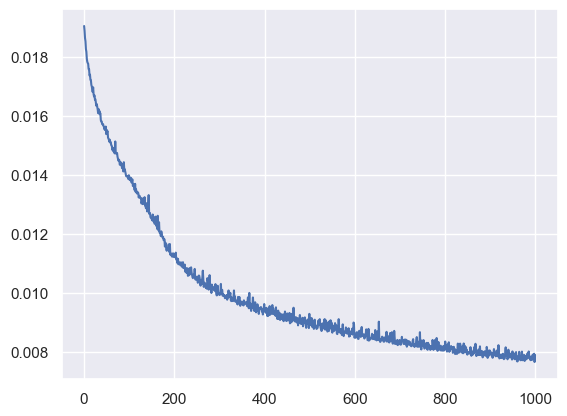

In [183]:
# plota as loss para ver se está treinando
plt.plot(history.history['loss'])

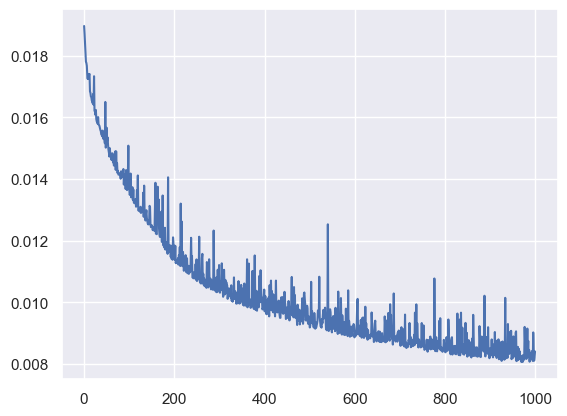

In [184]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(history.history['val_loss']) #dar smoothie nas curvas kkkkkk para colocar no paper

## Testando modelo treinado

In [206]:
pred = model.predict(X_test)

254/254 [==============================] - 0s 2ms/step


(-1.0, 1.0)

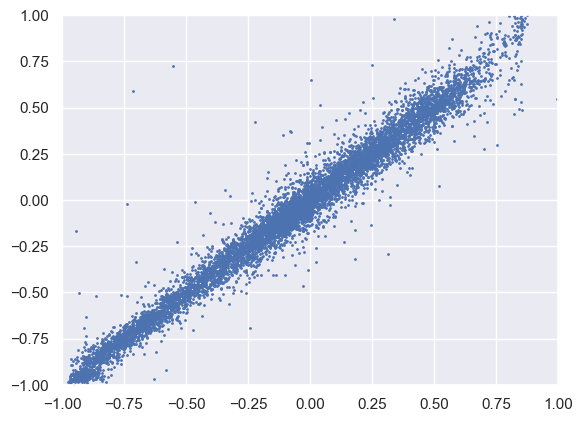

In [207]:
# plota o pred de acordo com o Y_test (teff)
plt.scatter(pred, Y_test, s=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

(0.0, 5.0)

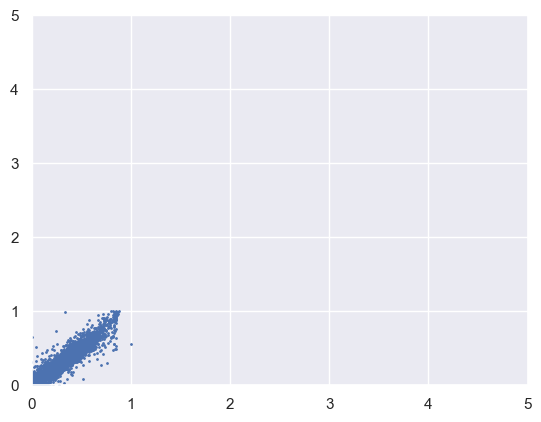

In [208]:
# plota o pred de acordo com o Y_test (logg)
plt.scatter(pred, Y_test, s=1)
plt.xlim(0, 5)
plt.ylim(0, 5)

(-3.0, 1.0)

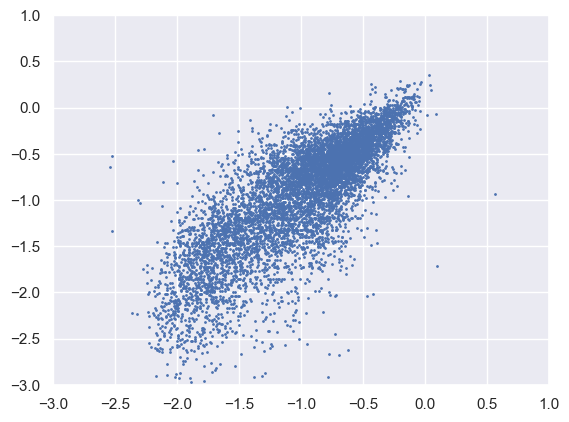

In [153]:
# plota o pred de acordo com o Y_test (feh)
plt.scatter(pred, Y_test, s=1)
plt.xlim(-3, 1)
plt.ylim(-3, 1)

In [209]:
for i in range(len(pred)):
    print(f'{pred[i]} - {np.array(Y_test)[i]}')

[0.45818034] - [0.503002]
[-0.48109353] - [-0.50567045]
[-0.8551837] - [-0.92194797]
[-0.29517934] - [-0.26284189]
[-0.20306547] - [-0.29019346]
[0.2252669] - [0.1694463]
[-0.04641072] - [0.01000667]
[0.5226076] - [0.36424283]
[0.40837136] - [0.39226151]
[-0.34798923] - [-0.37158105]
[0.83136815] - [0.86724483]
[0.13088991] - [0.10607071]
[-0.07688417] - [0.00133422]
[0.39535147] - [0.32688459]
[0.3770456] - [0.34889927]
[0.22663373] - [0.2221481]
[-0.93800133] - [-0.94663109]
[-0.79412574] - [-0.84523015]
[-0.3902671] - [-0.45163442]
[0.08188406] - [0.26084056]
[-0.5442534] - [-0.55703803]
[0.19948213] - [0.20146765]
[-0.50870895] - [-0.503002]
[0.17468809] - [0.17211474]
[0.53638273] - [0.61107405]
[-0.8117429] - [-0.84923282]
[-0.9225669] - [-0.9472982]
[-0.08662803] - [-0.0993996]
[0.3180901] - [0.39426284]
[-0.5919118] - [-0.54036024]
[-0.4667617] - [-0.49299533]
[-0.02863067] - [0.0587058]
[-0.20349148] - [-0.21480987]
[0.12590785] - [0.16277518]
[-0.324345] - [-0.30153436]
[0.28

[-0.06657342] - [-0.09806538]
[0.5592992] - [0.51567712]
[-0.15443246] - [-0.06270847]
[-0.13133486] - [-0.16144096]
[-0.2671653] - [-0.24749833]
[0.33481005] - [0.31354236]
[-0.15324295] - [-0.11607738]
[0.38105288] - [0.59906604]
[-0.41862783] - [-0.41894596]
[-0.735189] - [-0.74516344]
[0.3986377] - [0.27751835]
[0.468167] - [0.37691795]
[-0.5097557] - [-0.58172115]
[-0.3127358] - [-0.40693796]
[-0.50130254] - [-0.49633089]
[-0.3692535] - [-0.44763175]
[-0.94607556] - [-0.96597732]
[-0.6803364] - [-0.67711808]
[0.3530554] - [0.239493]
[-0.20798458] - [-0.23348899]
[0.4260908] - [0.52101401]
[-0.04583967] - [-0.15010007]
[0.57843393] - [0.59906604]
[-0.07666697] - [-0.16210807]
[0.3709361] - [0.4856571]
[-0.4499537] - [-0.46831221]
[-0.5321511] - [-0.62841895]
[-0.16433848] - [-0.18679119]
[-0.5032358] - [-0.52168112]
[0.25014228] - [0.21347565]
[-0.73620206] - [-0.75650434]
[0.05672959] - [0.25283522]
[-0.15038545] - [-0.20280187]
[0.2672721] - [0.23482322]
[0.36254197] - [0.3635757

[0.07000393] - [0.19346231]
[0.01527633] - [0.13008672]
[0.00563564] - [0.05670447]
[0.42040414] - [0.45430287]
[0.16467674] - [0.17078052]
[-0.07546129] - [-0.0466978]
[0.0274774] - [-0.1460974]
[0.03295555] - [0.01000667]
[0.6117501] - [0.57838559]
[-0.03750721] - [0.04803202]
[-0.27302107] - [-0.25683789]
[0.47899523] - [0.46297532]
[-0.94053507] - [-0.94062708]
[0.58315957] - [0.63709139]
[0.02386698] - [0.05937292]
[-0.13535964] - [-0.24149433]
[-0.9172014] - [-0.93462308]
[0.6242506] - [0.6317545]
[-0.5968517] - [-0.51901268]
[-0.03778025] - [-0.02401601]
[-0.5570719] - [-0.5323549]
[-0.7574438] - [-0.74182789]
[-0.28291196] - [-0.21014009]
[-0.228804] - [-0.17144763]
[-0.4204913] - [-0.41894596]
[0.00131096] - [-0.07404937]
[-0.08338657] - [-0.06537692]
[-0.14730282] - [-0.17811875]
[-0.37300494] - [-0.30553702]
[-0.67350155] - [-0.65643763]
[-0.67113894] - [-0.6844563]
[-0.8939523] - [-0.93929286]
[-0.11131028] - [-0.03268846]
[0.22350676] - [0.24482989]
[-0.89008474] - [-0.837

[-0.30012146] - [-0.33622415]
[0.44579262] - [0.55703803]
[0.41768235] - [0.33955971]
[-0.2638181] - [-0.17745163]
[0.25557277] - [0.33155437]
[0.5112648] - [0.51100734]
[-0.71620005] - [-0.62908606]
[-0.4230441] - [-0.3275517]
[-0.24070181] - [-0.15076718]
[-0.00135062] - [-0.0820547]
[-0.19192316] - [-0.09139426]
[-0.13191608] - [-0.19613075]
[0.01090536] - [-0.04536358]
[0.44718224] - [0.5496998]
[-0.08213824] - [-0.08072048]
[-0.6980521] - [-0.68178786]
[-0.12112901] - [-0.12941961]
[-0.9116575] - [-0.87525017]
[0.11829688] - [0.10673783]
[-0.10902179] - [-0.14076051]
[0.09859727] - [0.1287525]
[0.55989087] - [0.69713142]
[-0.1737272] - [-0.1460974]
[0.07051666] - [0.09272849]
[0.60371745] - [0.61641094]
[0.565335] - [0.54636424]
[0.24507682] - [0.19679787]
[-0.1185438] - [-0.08338893]
[-0.9195413] - [-0.94329553]
[-0.09041748] - [-0.07738492]
[0.32800692] - [0.39026017]
[0.8641408] - [0.93862575]
[0.05626342] - [-0.10673783]
[-0.71624964] - [-0.77384923]
[0.35344458] - [0.41227485

[0.3422449] - [0.3509006]
[0.25846338] - [0.29619746]
[-0.7530233] - [-0.80386925]
[-0.8858178] - [-0.91727819]
[0.12487567] - [0.07805203]
[0.73132193] - [0.86991328]
[0.03457327] - [-0.03935957]
[0.05293366] - [0.05336891]
[0.12709586] - [0.13609073]
[0.5264568] - [0.67378252]
[0.2266206] - [0.32488326]
[-0.07158806] - [-0.1927952]
[-0.39436623] - [-0.37358239]
[0.00822845] - [0.08272181]
[-0.24412112] - [-0.14276184]
[0.08456766] - [0.0640427]
[-0.08060693] - [-0.12941961]
[0.17098865] - [0.19346231]
[0.57301134] - [0.51567712]
[0.30431738] - [0.28619079]
[-0.08462449] - [-0.12608406]
[-0.04942688] - [-0.03135424]
[-0.17688745] - [-0.15076718]
[-0.10728178] - [-0.13609073]
[0.04031603] - [0.11807872]
[0.30578732] - [0.27885257]
[0.465354] - [0.3915944]
[-0.63531756] - [-0.60773849]
[-0.43019155] - [-0.38692462]
[-0.83717024] - [-0.8772515]
[-0.04451499] - [-0.00733823]
[-0.00205861] - [-0.14142762]
[-0.55783325] - [-0.55370247]
[-0.08227743] - [0.11474316]
[-0.7063655] - [-0.6937958

In [210]:
a = []
f = 0
for i in range(len(pred)):
    a.append(pred[i] - np.array(Y_test)[i])
    f += int(pred[i] - np.array(Y_test)[i])

In [211]:
f/len(pred)

-0.0002468831008517467

In [212]:
a = np.array(a)

In [213]:
print(f'MAX: {a.max()}')
print(f'MIN: {a.min()}')
print(f'MEAN: {a.mean()}')

MAX: 0.6022580341548425
MIN: -1.3076425014216553
MEAN: -0.0016592028668541816


In [47]:
#scaler.inverse_transform(pred)

array([[3.5681224],
       [4.2849364],
       [4.068923 ],
       ...,
       [4.0895677],
       [4.1131425],
       [4.0872927]], dtype=float32)

In [48]:
#scaler.inverse_transform(Y_test)

array([[3.52],
       [4.1 ],
       [3.68],
       ...,
       [3.94],
       [4.49],
       [2.72]])

# Aplicando rede treinada

In [88]:
csv2 = pd.read_csv("Halpha.csv", encoding='latin-1', index_col=['ID', 'RA', 'DEC'])

In [89]:
csv2

,,,Field,FWHM,ISOarea,KRON_RADIUS,MU_MAX,nDet_PStotal,PhotoFlagDet,CLASS_STAR,u_PStotal,J0378_PStotal,...,e_J0395_PStotal,e_J0410_PStotal,e_J0430_PStotal,e_g_PStotal,e_J0515_PStotal,e_r_PStotal,e_J0660_PStotal,e_i_PStotal,e_J0861_PStotal,e_z_PStotal
ID,RA,DEC,,,,,,,,,,,,,,,,,,,,,
b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,b'SPLUS-n14s03 ',2.162409,525,2.547039,10.630968,12.0,0,0.985563,16.675000,16.575087,...,0.016197,0.013491,0.011681,0.003638,0.006543,0.001912,0.001706,0.001566,0.002259,0.001615
b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,b'HYDRA-0077 ',2.060758,271,2.745416,12.111699,12.0,0,0.974406,15.377505,15.103262,...,0.007420,0.006743,0.006265,0.003002,0.005050,0.002588,0.002551,0.002657,0.004397,0.003160
b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,b'SPLUS-s23s45 ',2.044366,246,2.879416,11.472648,12.0,0,0.994988,15.014418,15.013782,...,0.006913,0.007903,0.007426,0.003380,0.006805,0.002777,0.002718,0.002879,0.005049,0.003880
b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,b'SPLUS-n18s18 ',2.552651,252,2.627111,10.996559,12.0,0,0.972722,19.206873,18.916110,...,0.045775,0.022941,0.014659,0.004242,0.007772,0.002779,0.002490,0.002253,0.002922,0.001966
b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,b'HYDRA-0049 ',3.168911,395,3.058134,11.737776,12.0,0,0.871400,16.499258,16.071520,...,0.009739,0.007266,0.006659,0.002987,0.006106,0.002627,0.003007,0.003147,0.003607,0.002895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'iDR3.SPLUS-n03s18.004879 ',174.344407,-3.312593,b'SPLUS-n03s18 ',5.641993,15,6.179567,17.176810,12.0,2,0.564282,21.547806,21.304468,...,1.106783,0.489786,0.377637,0.108107,0.332114,0.074605,0.043763,0.142963,0.140397,0.141498
b'iDR3.STRIPE82-0125.029072',327.127535,-0.797904,b'STRIPE82-0125',2.090127,7,1.820000,16.853830,12.0,0,0.549148,21.961760,21.633818,...,0.931720,1.855599,1.005176,0.215671,0.395559,0.109843,0.055459,0.116920,0.180835,0.204769
b'iDR3.STRIPE82-0132.057659',331.015699,1.107458,b'STRIPE82-0132',3.068043,10,5.251886,17.315880,12.0,2,0.609140,21.442451,22.669330,...,0.296826,0.328811,0.276437,0.119231,0.308578,0.085324,0.045233,0.163681,0.149418,0.400926


In [90]:
ndf = csv2[['u_PStotal', 'J0378_PStotal', 'J0395_PStotal', 
                 'J0410_PStotal', 'J0430_PStotal', 'g_PStotal', 
                 'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 
                 'i_PStotal', 'J0861_PStotal', 'z_PStotal']]

In [91]:
ndf.shape

(2187, 12)

In [92]:
test_x = ndf.to_numpy()

In [93]:
#when applying the model to your data (eg., jplus dr1), please run the following code.
model=load_model('model/model.h5')
result=model.predict(test_x)

69/69 [==============================] - 0s 883us/step


In [94]:
result

array([[60.618755],
       [53.27067 ],
       [52.312298],
       ...,
       [76.09923 ],
       [79.45547 ],
       [71.34779 ]], dtype=float32)

In [95]:
csv2['log_teff'] = result

In [98]:
csv2.to_csv("final.csv")